## Housing market in Australia -Jayasree Mangalagiri

## Problem Statement
    To help a US based company enter the Australian housing market by determining and suggesting variables are significant in predicting the price of a house. 
## procedure followed to arrive at the top features
1. EDA : a) split the data in to categorical and numerical data frames
         b) drop colums with > 70% missing values/imblance
         c) created Dummies for categirical and concatenated with the numerical dataframe
         d) checked the distribution of target variable and transform it 
2. RFE_CV : I used RFE cross validation to determine optimal number of n-features
3. RFE: I performed RFE with 30 features and checked the VIF, then I dropped the features with VIF=inf
4. Performed Ridge and got optimal alpha=0.1
5. performed Lasso and got features=20, alpha=85

## Reading the data

In [531]:
# common libraries used in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)


In [532]:
#Data importing
df=pd.read_csv("train (1).csv")

In [533]:
# top five rows and all the columns
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [534]:
#checking the shape if the DF
df.shape

(1460, 81)

In [535]:
#Description of the numerical dataframe
# there are outliers but I decided to keep them because the seller can make more money out of it
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

In [536]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data Cleaning 

In [537]:
missing = df.isnull().mean() * 100
missing.sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

In [538]:
above_10 = missing[missing > 10]
above_10

LotFrontage    17.739726
Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [539]:
df[above_10.index] = df[above_10.index].replace(np.nan,'Not present')
missing = df.isnull().mean() * 100

In [540]:
below_10 = missing[missing <= 10].sort_values(ascending = False)[:13]
below_10

GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [541]:
df[df[below_10.index].filter(like = 'Garage').select_dtypes(object).columns] =df[below_10.index].filter(like = 'Garage').select_dtypes(object).replace(np.nan,'No Garage')

In [542]:
missing = df.isnull().mean() * 100
below_10 = missing[missing <= 10].sort_values(ascending = False)[:13]
below_10

GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
SalePrice       0.000000
RoofStyle       0.000000
RoofMatl        0.000000
Exterior1st     0.000000
dtype: float64

In [543]:
df[df[below_10.index].filter(like = 'Bsmt').columns] = df[below_10.index].filter(like = 'Bsmt').replace(np.nan,'No Basement')

In [544]:
missing = df.isnull().mean() * 100
below_10 = missing[missing > 0].sort_values(ascending = False)
below_10

GarageYrBlt    5.547945
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493
dtype: float64

In [545]:
missing =df.isnull().mean() * 100
below_10 = missing[missing > 0].sort_values(ascending = False)
below_10

GarageYrBlt    5.547945
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493
dtype: float64

In [546]:
df = df.loc[df['Electrical'].dropna().index]
missing = df.isnull().mean() * 100
below_10 = missing[missing > 0].sort_values(ascending = False)
below_10

GarageYrBlt    5.551748
MasVnrArea     0.548321
MasVnrType     0.548321
dtype: float64

In [547]:
#Identifying the columns that are missing more than 70% of the data and dropping them
#df.columns[df.isnull().sum()/len(df)>.7]

In [548]:
#df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [549]:
df.shape

(1459, 81)

In [550]:
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street        Alley LotShape  \
0   1          60       RL          65     8450   Pave  Not present      Reg   
1   2          20       RL          80     9600   Pave  Not present      Reg   
2   3          60       RL          68    11250   Pave  Not present      IR1   
3   4          70       RL          60     9550   Pave  Not present      IR1   
4   5          60       RL          84    14260   Pave  Not present      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu  \
0             1          Gd             8        Typ           0  Not present   
1             1          TA             6        Typ           1           TA   
2             1          Gd             6        Typ           1           TA   

In [551]:
#The rest of the missing values will be droped during the analysis of the respective variables
df.isnull().sum()/len(df)*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.548321
MasVnrArea       0.548321
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [552]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## create Feature columns with the attributes that have similar class values

In [553]:
df['ExterQual']=df['ExterQual'].map({"Ex":"5","TA":"3","Gd":"4","Fa":"2","Po":"1","NaN":"0"})
df['BsmtQual']=df['BsmtQual'].map({"Ex":"5","TA":"3","Gd":"4","Fa":"2","Po":"1","NaN":"0"})
df['KitchenQual']=df['KitchenQual'].map({"Ex":"5","TA":"3","Gd":"4","Fa":"2","Po":"1","NaN":"0"})
df['FireplaceQu']=df['FireplaceQu'].map({"Ex":"5","TA":"3","Gd":"4","Fa":"2","Po":"1","NaN":"0"})
df['GarageQual']=df['GarageQual'].map({"Ex":"5","TA":"3","Gd":"4","Fa":"2","Po":"1","NaN":"0"})
df['HeatingQC']=df['HeatingQC'].map({"Ex":"5","TA":"3","Gd":"4","Fa":"2","Po":"1","NaN":"0"})



### Check the value counts to make sure the columns have similar Values

In [554]:
df['ExterQual'].value_counts()

3    905
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [555]:
df['BsmtQual'].value_counts()

3    649
4    617
5    121
2     35
Name: BsmtQual, dtype: int64

In [556]:
df['KitchenQual'].value_counts()

3    735
4    585
5    100
2     39
Name: KitchenQual, dtype: int64

In [557]:
df['FireplaceQu'].value_counts()

4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [558]:
df['GarageQual'].value_counts()

3    1310
2      48
4      14
1       3
5       3
Name: GarageQual, dtype: int64

In [559]:
df["HeatingQC"].value_counts()

5    741
3    428
4    240
2     49
1      1
Name: HeatingQC, dtype: int64

### create a dataframe for the above variables

In [560]:
OverallQual2=df[['ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual','HeatingQC']]

In [561]:
for i,col in enumerate(OverallQual2):
    OverallQual2.iloc[:, i]=OverallQual2.iloc[:, i].fillna(0)

### cast the dataframe to integer

In [562]:
OverallQual2 = OverallQual2.astype({"ExterQual":'int64'})

In [563]:
OverallQual2 = OverallQual2.astype({"BsmtQual":'int64'})

In [564]:
OverallQual2 = OverallQual2.astype({"KitchenQual":'int64'})

In [565]:
OverallQual2 = OverallQual2.astype({"FireplaceQu":'int64'})

In [566]:
OverallQual2 = OverallQual2.astype({"GarageQual":'int64'})

In [567]:
OverallQual2 = OverallQual2.astype({"HeatingQC":'int64'})

### Check the mean of the columns

In [568]:
OverallQual2.mean()

ExterQual      3.396162
BsmtQual       3.488691
KitchenQual    3.511309
FireplaceQu    1.826594
GarageQual     2.810144
HeatingQC      4.145305
dtype: float64

### Make a column for the average 

In [569]:
OverallQual2['OverallQual2_Ave']=OverallQual2.mean(axis=1)
OverallQual2.head()

ExterQual  BsmtQual  KitchenQual  FireplaceQu  GarageQual  HeatingQC  \
0          4         4            4            0           3          5   
1          3         4            3            3           3          5   
2          4         4            4            3           3          5   
3          3         3            4            4           3          4   
4          4         4            4            3           3          5   

   OverallQual2_Ave  
0          3.333333  
1          3.500000  
2          3.833333  
3          3.500000  
4          3.833333

### Copy the Column to the main dataframe and drop the original columns

In [570]:
#Copy the OverallQual2_Ave to Main DataFrame
df['OverallQual2_Ave']=OverallQual2['OverallQual2_Ave']
df.drop(['ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual',"HeatingQC"],axis=1,inplace=True)
df.shape

(1459, 76)

### Adding up the number of bathrooms

In [571]:
Num_BathRooms=df[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]]

In [572]:
### checking the value counts

In [573]:
df["BsmtFullBath"].value_counts()

0    855
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [574]:
df["BsmtHalfBath"].value_counts()

0    1377
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [575]:
df["HalfBath"].value_counts()

0    913
1    534
2     12
Name: HalfBath, dtype: int64

In [576]:
df["FullBath"].value_counts()

2    767
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [577]:
## Create a new column with sum of the number of bathrooms

In [578]:
Num_BathRooms['Num_Baths']=Num_BathRooms.sum(axis=1)
Num_BathRooms.head()

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  Num_Baths
0             1             0         2         1          4
1             0             1         2         0          3
2             1             0         2         1          4
3             1             0         1         0          2
4             1             0         2         1          4

## copy the Num_Baths to the main dataframe and drop the original columns

In [579]:
df["Num_Baths"]=Num_BathRooms["Num_Baths"]
df.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1,inplace=True)

In [580]:
df.shape

(1459, 73)

In [581]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoS

## create a dataframe for porch/deck area

In [582]:
Porch_Area=df[["WoodDeckSF",'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']]

In [583]:
## Create a column for the sum of the porch area

In [584]:
Porch_Area["Total_PorchSF"]=Porch_Area.sum(axis=1)
Porch_Area.head()

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           0           61              0          0            0   
1         298            0              0          0            0   
2           0           42              0          0            0   
3           0           35            272          0            0   
4         192           84              0          0            0   

   Total_PorchSF  
0             61  
1            298  
2             42  
3            307  
4            276

## copy the total sum of porch area to the main DataFrame and Drop the original columns

In [585]:
df["Total_PorchSF"]=Porch_Area["Total_PorchSF"]
df.drop(["WoodDeckSF",'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch'],axis=1, inplace=True)


In [586]:
df.shape

(1459, 69)

# creating dataframes by datatypes (changes will be made to the original dataframe)
# 1. data type = float64

In [587]:
df_float=df.select_dtypes(include=['float64'])#DataFrame with data type =float

In [588]:
df_float.shape

(1459, 3)

In [589]:
df_float.columns

Index(['MasVnrArea', 'GarageYrBlt', 'OverallQual2_Ave'], dtype='object')

In [590]:
df_float.describe(percentiles=[0.25,0.5,0.75,0.85,0.9,0.95,0.99])

MasVnrArea  GarageYrBlt  OverallQual2_Ave
count  1451.00000  1378.000000       1459.000000
mean    103.75672  1978.485486          3.196367
std     181.10815    24.686740          0.636546
min       0.00000  1900.000000          1.000000
25%       0.00000  1961.000000          2.666667
50%       0.00000  1980.000000          3.166667
75%     166.00000  2002.000000          3.666667
85%     262.50000  2005.000000          4.000000
90%     335.00000  2006.000000          4.000000
95%     456.00000  2007.000000          4.166667
99%     792.00000  2009.000000          4.500000
max    1600.00000  2010.000000          4.666667

In [591]:
df["GarageYrBlt"].value_counts() # let us convert the year built in to age

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    48
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [592]:
df["GarageYrBlt"]= 2010-(df["GarageYrBlt"])

In [593]:
df["GarageYrBlt"].value_counts()

5.0      65
4.0      59
6.0      53
7.0      50
3.0      48
33.0     35
12.0     31
11.0     30
2.0      29
34.0     29
10.0     27
8.0      26
42.0     26
60.0     24
17.0     22
44.0     21
45.0     21
1.0      21
48.0     21
52.0     21
53.0     20
14.0     20
40.0     20
9.0      20
32.0     19
50.0     19
13.0     19
56.0     19
36.0     18
16.0     18
46.0     18
15.0     18
51.0     17
47.0     16
54.0     16
20.0     16
43.0     15
30.0     15
31.0     15
41.0     15
38.0     14
70.0     14
37.0     14
22.0     14
90.0     14
49.0     13
18.0     13
39.0     13
55.0     13
57.0     12
62.0     11
23.0     11
29.0     10
25.0     10
85.0     10
69.0     10
21.0     10
71.0      9
19.0      9
35.0      9
80.0      8
61.0      8
26.0      8
27.0      7
59.0      6
84.0      6
24.0      6
74.0      5
94.0      5
88.0      5
82.0      4
65.0      4
75.0      4
79.0      4
64.0      4
28.0      4
87.0      3
58.0      3
72.0      3
0.0       3
100.0     3
86.0      3
78.0      3
89.0

In [594]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["YearBuilt"].iloc[0])

## 2. data type = object

In [595]:
df_object=df.select_dtypes(include=['object'])


In [596]:
df_object.shape

(1459, 38)

In [597]:
df_object.columns

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [598]:
df_object.describe()#checking the description of the columns

MSZoning  LotFrontage Street        Alley LotShape LandContour  \
count      1459         1459   1459         1459     1459        1459   
unique        5          111      2            3        4           4   
top          RL  Not present   Pave  Not present      Reg         Lvl   
freq       1150          259   1453         1368      924        1310   

       Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
count       1459      1459      1459         1459       1459       1459   
unique         2         5         3           25          9          8   
top       AllPub    Inside       Gtl        NAmes       Norm       Norm   
freq        1458      1051      1381          225       1259       1444   

       BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
count      1459       1459      1459     1459        1459        1459   
unique        5          8         6        8          15          16   
top        1Fam     1Story     Gable  CompShg     VinylSd     VinylSd   
freq       1219        726      1140     1433         514         503   

       MasVnrType ExterCond Foundation BsmtCond BsmtExposure BsmtFinType1  \
count        1451      1459       1459     1459         1459         1459   
unique          4         5          6        5            5            7   
top          None        TA      PConc       TA           No          Unf   
freq          863      1281        646     1310          952          429   

       BsmtFinType2 Heating CentralAir Electrical Functional GarageType  \
count          1459    1459       1459       1459       1459       1459   
unique            7       6          2          5          7          7   
top             Unf    GasA          Y      SBrkr        Typ     Attchd   
freq           1255    1427       1364       1334       1359        870   

       GarageFinish GarageCond PavedDrive       PoolQC        Fence  \
count          1459       1459       1459         1459         1459   
unique            4          6          3            4            5   
top             Unf         TA          Y  Not present  Not present   
freq            605       1325       1339         1452         1178   

        MiscFeature SaleType SaleCondition  
count          1459     1459          1459  
unique            5        9             6  
top     Not present       WD        Normal  
freq           1405     1266          1197

In [599]:
1460*0.7

1021.9999999999999

In [600]:
df.drop(['MasVnrType','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','LandSlope','Condition2','Condition2','BldgType'
      ,'RoofStyle','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageCond',
      'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [601]:
df_object.drop(['MasVnrType','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','LandSlope','Condition2','Condition2','BldgType'
      ,'RoofStyle','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageCond',
      'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [602]:
df_object.shape

(1459, 12)

## Checking Value counts and merging if needed

In [603]:
df_object.columns

Index(['LotFrontage', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'GarageType', 'GarageFinish'],
      dtype='object')

In [604]:
df_object.isna().sum()/len(df)

LotFrontage     0.0
LotShape        0.0
Neighborhood    0.0
Condition1      0.0
HouseStyle      0.0
Exterior1st     0.0
Exterior2nd     0.0
Foundation      0.0
BsmtExposure    0.0
BsmtFinType1    0.0
GarageType      0.0
GarageFinish    0.0
dtype: float64

In [605]:
df['LotShape'].value_counts()

Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [606]:
df['LotShape'][df['LotShape'].isin(df['LotShape'].value_counts()[2:].index)]="IR1"

In [607]:
df["LotShape"].value_counts()

Reg    924
IR1    535
Name: LotShape, dtype: int64

In [608]:
df["Neighborhood"].value_counts(normalize=True)*100#not too imblanced so let's leave it

NAmes      15.421522
CollgCr    10.281014
OldTown     7.745031
Edwards     6.854010
Somerst     5.894448
Gilbert     5.414668
NridgHt     5.277587
Sawyer      5.071967
NWAmes      5.003427
SawyerW     4.043866
BrkSide     3.975326
Crawfor     3.495545
Mitchel     3.358465
NoRidge     2.810144
Timber      2.535984
IDOTRR      2.535984
ClearCr     1.919123
StoneBr     1.713502
SWISU       1.713502
Blmngtn     1.165182
MeadowV     1.165182
BrDale      1.096642
Veenker     0.753941
NPkVill     0.616861
Blueste     0.137080
Name: Neighborhood, dtype: float64

In [609]:
df['HouseStyle'].value_counts(normalize=True)

1Story    0.497601
2Story    0.305003
1.5Fin    0.105552
SLvl      0.043866
SFoyer    0.025360
1.5Unf    0.009596
2.5Unf    0.007539
2.5Fin    0.005483
Name: HouseStyle, dtype: float64

In [610]:
df['HouseStyle'][df["HouseStyle"].isin(df["HouseStyle"].value_counts()[2:].index)]="1.5Fin"

In [611]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    288
Name: HouseStyle, dtype: int64

In [612]:
df['Exterior1st'].value_counts(normalize=True)*100

VinylSd    35.229609
HdBoard    15.215901
MetalSd    15.078821
Wd Sdng    14.119260
Plywood     7.402330
CemntBd     4.180946
BrkFace     3.427005
WdShing     1.782042
Stucco      1.713502
AsbShng     1.370802
BrkComm     0.137080
Stone       0.137080
CBlock      0.068540
ImStucc     0.068540
AsphShn     0.068540
Name: Exterior1st, dtype: float64

In [613]:
df["Exterior1st"][df['Exterior1st'].isin(df["Exterior1st"].value_counts()[4:].index)]="Plywood"

In [614]:
df["Exterior1st"].value_counts()

VinylSd    514
Plywood    297
HdBoard    222
MetalSd    220
Wd Sdng    206
Name: Exterior1st, dtype: int64

In [615]:
df.shape

(1459, 43)

In [616]:
df["Exterior2nd"].value_counts()

VinylSd    503
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [617]:
df["Exterior2nd"][df['Exterior2nd'].isin(df["Exterior2nd"].value_counts()[5:].index)]="CmentBd"

In [618]:
df["Exterior2nd"].value_counts()

VinylSd    503
MetalSd    214
HdBoard    207
Wd Sdng    197
CmentBd    196
Plywood    142
Name: Exterior2nd, dtype: int64

In [621]:
df["Foundation"].value_counts()

PConc     646
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [622]:
df["Foundation"][df["Foundation"].isin(df["Foundation"].value_counts()[2:].index)]="BrkTil"

In [623]:
df["Foundation"].value_counts()

PConc     646
CBlock    634
BrkTil    179
Name: Foundation, dtype: int64

In [624]:
df_object.columns

Index(['LotFrontage', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'GarageType', 'GarageFinish'],
      dtype='object')

In [625]:
df["BsmtExposure"].value_counts()

No             952
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [632]:
df["BsmtExposure"][df["BsmtExposure"].isin(df["BsmtExposure"].value_counts()[3:].index)]="Mn"

In [631]:
df["BsmtFinType1"].value_counts()

Unf            429
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [633]:
df["BsmtFinType1"][df["BsmtFinType1"].isin(df["BsmtFinType1"].value_counts()[5:].index)]="Absent"

In [634]:
df["BsmtFinType1"].value_counts()

Unf       429
GLQ       418
ALQ       220
BLQ       148
Rec       133
Absent    111
Name: BsmtFinType1, dtype: int64

In [635]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'OverallQual2_Ave',
       'Num_Baths', 'Total_PorchSF'],
      dtype='object')

In [636]:
df.shape

(1459, 43)

In [637]:
df["MSSubClass"].value_counts()/len(df)*100# there are many classes that are imbalanced so I will drop this.

20     36.737491
60     20.493489
50      9.869774
120     5.962988
30      4.729267
160     4.318026
70      4.112406
80      3.906785
90      3.564085
190     2.056203
85      1.370802
75      1.096642
45      0.822481
180     0.685401
40      0.274160
Name: MSSubClass, dtype: float64

In [638]:
df["MSSubClass"][df["MSSubClass"].isin(df["MSSubClass"].value_counts()[7:].index)]="Other"
df["MSSubClass"][df["MSSubClass"].isin(df["MSSubClass"].value_counts()[2:7].index)]="O"

In [639]:
df["LotArea"].value_counts()

7200     25
9600     24
6000     17
9000     14
10800    14
         ..
7406      1
9453      1
9450      1
15593     1
11249     1
Name: LotArea, Length: 1072, dtype: int64

In [640]:
df["LotArea"].describe().astype(int)

count      1459
mean      10517
std        9984
min        1300
25%        7549
50%        9477
75%       11603
max      215245
Name: LotArea, dtype: int64

In [641]:
print(pd.cut(df["LotArea"], bins=np.linspace(1300, 215245, 10)))

0       (1300.0, 25071.667]
1       (1300.0, 25071.667]
2       (1300.0, 25071.667]
3       (1300.0, 25071.667]
4       (1300.0, 25071.667]
               ...         
1455    (1300.0, 25071.667]
1456    (1300.0, 25071.667]
1457    (1300.0, 25071.667]
1458    (1300.0, 25071.667]
1459    (1300.0, 25071.667]
Name: LotArea, Length: 1459, dtype: category
Categories (9, interval[float64]): [(1300.0, 25071.667] < (25071.667, 48843.333] < (48843.333, 72615.0] < (72615.0, 96386.667] ... (120158.333, 143930.0] < (143930.0, 167701.667] < (167701.667, 191473.333] < (191473.333, 215245.0]]


In [642]:
cut_labels=["0","1","2","3","4","5","6","7","8"]
cut_bins=[1300.0, 25071.667, 48843.333,72615.0, 96386.667,120158.333,143930.0, 167701.667, 191473.333, 215245.0]
df['LotArea'] = pd.cut(df['LotArea'], bins=cut_bins, labels=cut_labels)

In [643]:
df['LotArea'].value_counts()# the classes are highly imbalanced even after up-sampling so I will drop it

0    1427
1      20
2       7
6       2
8       1
4       1
7       0
5       0
3       0
Name: LotArea, dtype: int64

In [644]:
df.drop(['LotArea'],axis=1,inplace=True)

In [645]:
df.shape

(1459, 42)

In [646]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotShape', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'OverallQual2_Ave', 'Num_Baths',
       'Total_PorchSF'],
      dtype='object')

## Dropping columns because of class imbalance

In [648]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotShape', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'OverallQual2_Ave', 'Num_Baths',
       'Total_PorchSF'],
      dtype='object')

In [649]:
df["GarageCars"].value_counts()

2    823
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

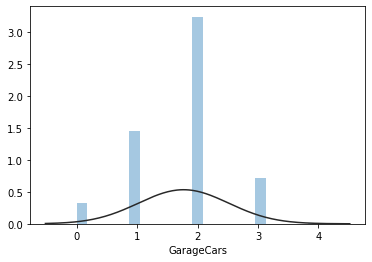

In [650]:
from scipy.stats import norm
sns.distplot(df["GarageCars"],fit=norm, kde=False)#data is slightly skewed but it is close to normal

## Converting years in to age

In [651]:
from datetime import datetime
now = datetime.now()
# get year from date
Current=now.strftime("%Y")
X=int(Current)


In [652]:
df["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64

In [653]:
df["YrSold"]= X-(df["YrSold"])

In [654]:
df["YrSold"].value_counts()

11    338
13    329
14    314
12    303
10    175
Name: YrSold, dtype: int64

In [655]:
df["YearBuilt"].value_counts()

2006    66
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
1910    17
1960    17
1993    17
1978    16
1955    16
1925    16
1963    16
1967    16
1996    15
1941    15
1964    15
1969    14
1956    14
1961    14
1997    14
1948    14
1992    13
1990    12
1953    12
1949    12
1988    11
1973    11
1915    10
1900    10
1980    10
1974    10
1979     9
1926     9
1930     9
1936     9
1984     9
1939     8
1922     8
1975     8
1916     8
1924     7
1928     7
1918     7
1914     7
1923     7
1946     7
1935     6
1945     6
1931     6
1982     6
1921     6
1951     6
1985     5
1937     5
1947     5
1991     5
1981     5
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3

In [656]:
df["YearBuilt"]= X-(df["YearBuilt"])

In [657]:
df["YearBuilt"].value_counts()

14     66
15     64
16     54
13     49
17     45
44     33
43     32
100    30
61     26
22     25
21     25
66     24
20     24
62     24
55     24
50     24
12     23
48     23
18     23
52     22
49     22
19     20
63     20
70     20
58     19
26     19
11     18
80     18
25     18
54     18
60     17
110    17
27     17
53     16
42     16
57     16
65     16
95     16
56     15
24     15
79     15
72     14
51     14
23     14
59     14
64     14
28     13
67     12
71     12
30     12
32     11
47     11
46     10
105    10
40     10
120    10
36      9
41      9
94      9
84      9
90      9
45      8
104     8
81      8
98      8
106     7
102     7
92      7
74      7
97      7
96      7
38      6
85      6
89      6
69      6
99      6
75      6
68      5
73      5
39      5
83      5
35      5
34      5
29      5
91      4
140     4
88      4
82      4
37      4
31      3
101     3
33      3
108     3
93      3
86      3
78      2
128     2
130     2
135     2
112     2


In [658]:
df["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     75
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
1990     15
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, dtype: int64

In [659]:
df["YearRemodAdd"]=X-(df["YearRemodAdd"])

In [660]:
df["YearRemodAdd"].value_counts()

70    178
14     97
13     75
15     73
16     62
20     55
17     51
18     48
12     40
24     36
22     36
25     31
44     30
21     30
50     26
23     25
43     25
11     23
26     22
19     21
48     20
27     19
55     19
61     18
49     18
28     17
52     17
42     16
30     15
54     15
62     15
51     14
58     14
66     14
29     14
57     13
40     12
60     12
53     12
31     11
47     11
56     11
33     10
67     10
64     10
41     10
45     10
35      9
65      9
63      9
32      9
59      8
39      8
46      7
38      7
36      7
10      6
37      5
34      5
68      5
69      4
Name: YearRemodAdd, dtype: int64

## Deriving the years since remodel and create a column in the dataframe


In [661]:
Age_Of_Home=df[["YearBuilt",'YearRemodAdd','YrSold']]
Age_Of_Home["Years_since_remodelling"]=abs(df['YearRemodAdd']-df["YearBuilt"])
df["Years_since_remodelling"]=Age_Of_Home["Years_since_remodelling"]
Age_Of_Home.head()

YearBuilt  YearRemodAdd  YrSold  Years_since_remodelling
0         17            17      12                        0
1         44            44      13                        0
2         19            18      12                        1
3        105            50      14                       55
4         20            20      12                        0

In [662]:
## creating a dataframe for integers to check for outliers 

In [132]:
df_int=df.select_dtypes(include=['int64'])

In [133]:
df_float=df.select_dtypes(include=['float'])

In [134]:
df_float.columns

Index(['GarageYrBlt', 'OverallQual2_Ave'], dtype='object')

In [135]:
df_int.columns

Index(['Id', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Num_Baths',
       'Total_PorchSF', 'Years_since_remodelling'],
      dtype='object')

### Concatenating float and integer DFs

In [136]:
df_num=pd.concat([df_int,df_float],1)

In [137]:
df_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    730.500000     6.099315     5.575342    48.732192     35.134247   
std     421.610009     1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000     1.000000    10.000000     10.000000   
25%     365.750000     5.000000     5.000000    20.000000     16.000000   
50%     730.500000     6.000000     5.000000    47.000000     26.000000   
75%    1095.250000     7.000000     6.000000    66.000000     53.000000   
90%    1314.100000     8.000000     7.000000    95.100000     70.000000   
95%    1387.050000     8.000000     8.000000   104.000000     70.000000   
99%    1445.410000    10.000000     9.000000   120.820000     70.000000   
max    1460.000000    10.000000     9.000000   148.000000     70.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
90%    1065.500000   117.200000  1232.000000  1602.200000  1680.000000   
95%    1274.000000   396.200000  1468.000000  1753.000000  1831.250000   
99%    1572.410000   830.380000  1797.050000  2155.050000  2219.460000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BedroomAbvGr  KitchenAbvGr  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      2.866438      1.046575   
std     436.528436     48.623081   525.480383      0.815778      0.220338   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      2.000000      1.000000   
50%       0.000000      0.000000  1464.000000      3.000000      1.000000   
75%     728.000000      0.000000  1776.750000      3.000000      1.000000   
90%     954.200000      0.000000  2158.300000      4.000000      1.000000   
95%    1141.050000      0.000000  2466.100000      4.000000      1.000000   
99%    1418.920000    360.000000  3123.480000      5.000000      2.000000   
max    2065.000000    572.000000  5642.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea     PoolArea  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137     2.758904   
std        1.625393     0.644666     0.747315   213.804841    40.177307   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000     0.000000   
90%        9.000000     1.000000     3.000000   757.100000     0.000000   
95%       10.000000     2.000000     3.000000   850.100000     0.000000   
99%       11.000000     2.000000     3.000000  1002.790000     0.000000   
max       14.000000     3.000000     4.000000  1418.000000   738.000000   

            MiscVal       MoSold       YrSold      SalePrice    Num_Baths  \
count   1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean      43.489041     6.321918    12.184247  180921.195890     2.430822   
std      496.123024     2.703626     1.328095   79442.502883     0.922647   
min        0.000000     1.000000    10.000000   34900.000000     1.000000   
25%        0.00

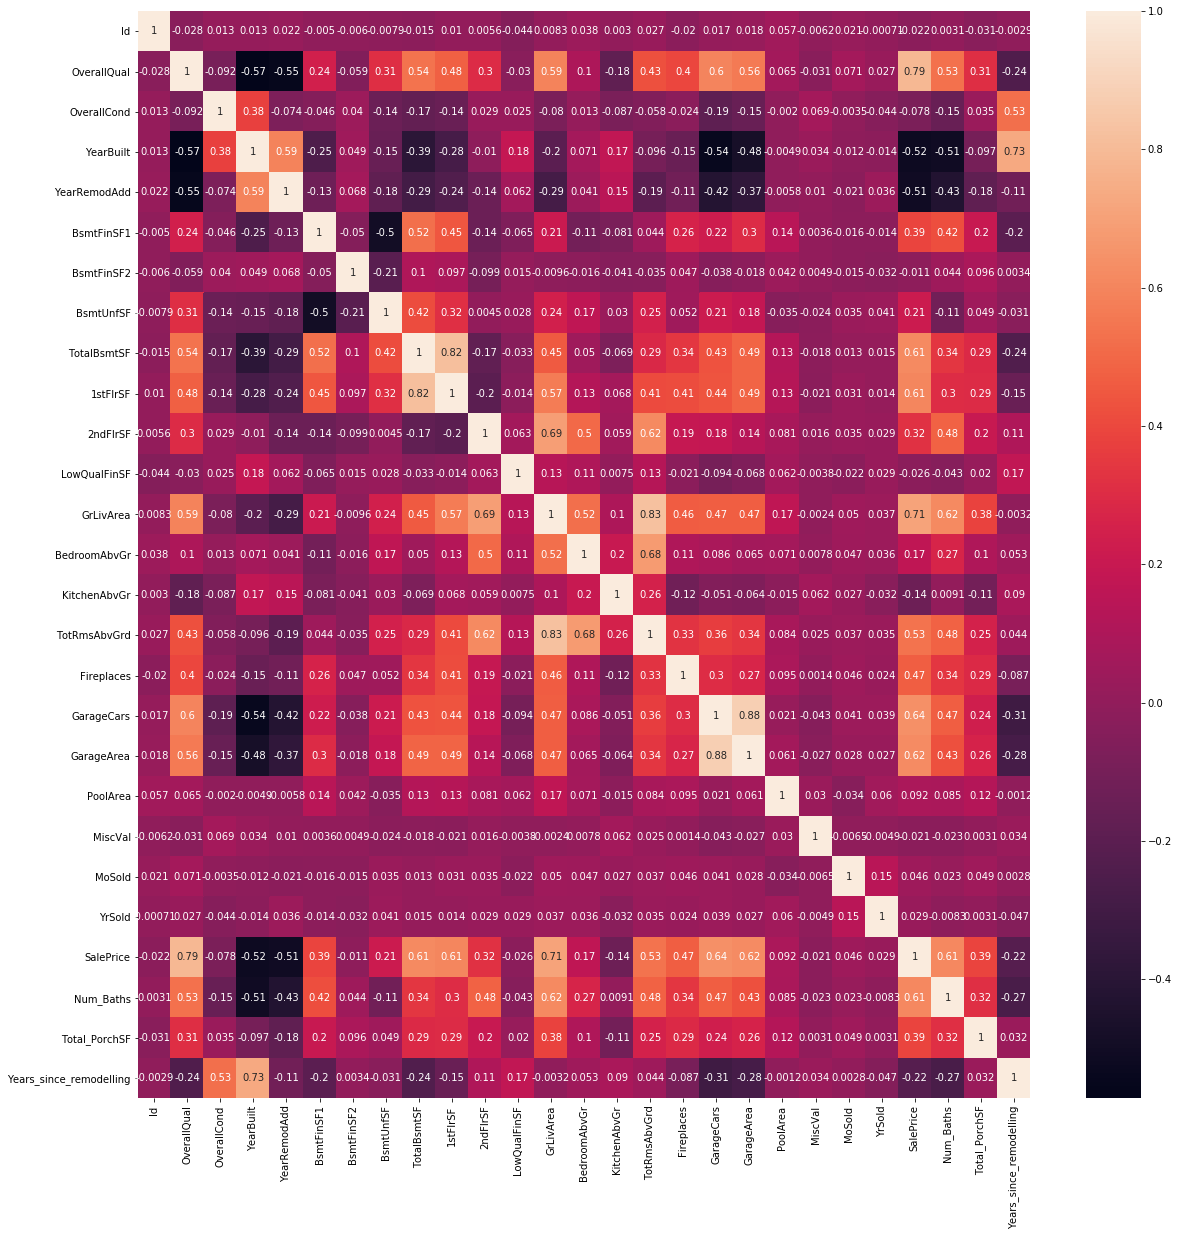

In [138]:
#Heatmap to check correlation
plt.figure(figsize=(20,20))
sns.heatmap(df_int.corr(),annot=True)


In [139]:
df.shape

(1460, 41)

In [140]:
df.columns

Index(['Id', 'LotShape', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'OverallQual2_Ave', 'Num_Baths', 'Total_PorchSF',
       'Years_since_remodelling'],
      dtype='object')

In [141]:
df.head()

Id LotShape Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  \
0   1      Reg      CollgCr     2Story            7            5         17   
1   2      Reg      Veenker     1Story            6            8         44   
2   3      IR1      CollgCr     2Story            7            5         19   
3   4      IR1      Crawfor     2Story            7            5        105   
4   5      IR1      NoRidge     2Story            8            5         20   

   YearRemodAdd Exterior1st Exterior2nd MasVnrType Foundation BsmtExposure  \
0            17     VinylSd     VinylSd    BrkFace      PConc           No   
1            44     MetalSd     MetalSd       None     CBlock           Gd   
2            18     VinylSd     VinylSd    BrkFace      PConc       Absent   
3            50     Wd Sdng     CmentBd       None     BrkTil           No   
4            20     VinylSd     VinylSd    BrkFace      PConc           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          GLQ         706           0        150          856       856   
1          ALQ         978           0        284         1262      1262   
2          GLQ         486           0        434          920       920   
3          ALQ         216           0        540          756       961   
4          GLQ         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0       854             0       1710             3             1   
1         0             0       1262             3             1   
2       866             0       1786             3             1   
3       756             0       1717             3             1   
4      1053             0       2198             4             1   

   TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0             8           0     Attchd          7.0          RFn           2   
1             6           1     Attchd         34.0          RFn           2   
2             6           1     Attchd          9.0          RFn           2   
3             7           1     Detchd         12.0          Unf           3   
4             9           1     Attchd         10.0          RFn           3   

   GarageArea  PoolArea  MiscVal  MoSold  YrSold SaleCondition  SalePrice  \
0         548         0        0       2      12        Normal     208500   
1         460         0        0       5      13        Normal     181500   
2         608         0        0       9      12        Normal     223500   
3         642         0        0       2      14       Abnorml     140000   
4         836         0        0      12      12        Normal     250000   

   OverallQual2_Ave  Num_Baths  Total_PorchSF  Years_since_remodelling  
0          3.333333          4             61                        0  
1          3.500000          3            298                        0  
2          3.833333          4             42                        1  
3          3.500000          2            307                       55  
4          3.833333          4            276                        0

# Getting Dummy variables for the categorical variables

In [142]:
df_dummies=pd.get_dummies(df_object,drop_first=True)

In [221]:
df_dummies.head()

LotShape_IR2  LotShape_IR3  LotShape_Reg  Neighborhood_Blueste  \
0             0             0             1                     0   
1             0             0             1                     0   
2             0             0             0                     0   
3             0             0             0                     0   
4             0             0             0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  HouseStyle_1.5Unf  \
0                    0                     0                  0   
1                    0                     1                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   
1                  1                  0                  0                  0   
2

## Drop Original columns 

In [144]:
df_object.columns

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [145]:
df.drop(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'GarageType', 'GarageFinish', 'SaleCondition'],axis=1,inplace=True)

In [146]:
df_dum=pd.concat([df,df_dummies],1)

In [147]:
df_dum.columns

Index(['Id', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=120)

In [148]:
df_dum.shape

(1460, 120)

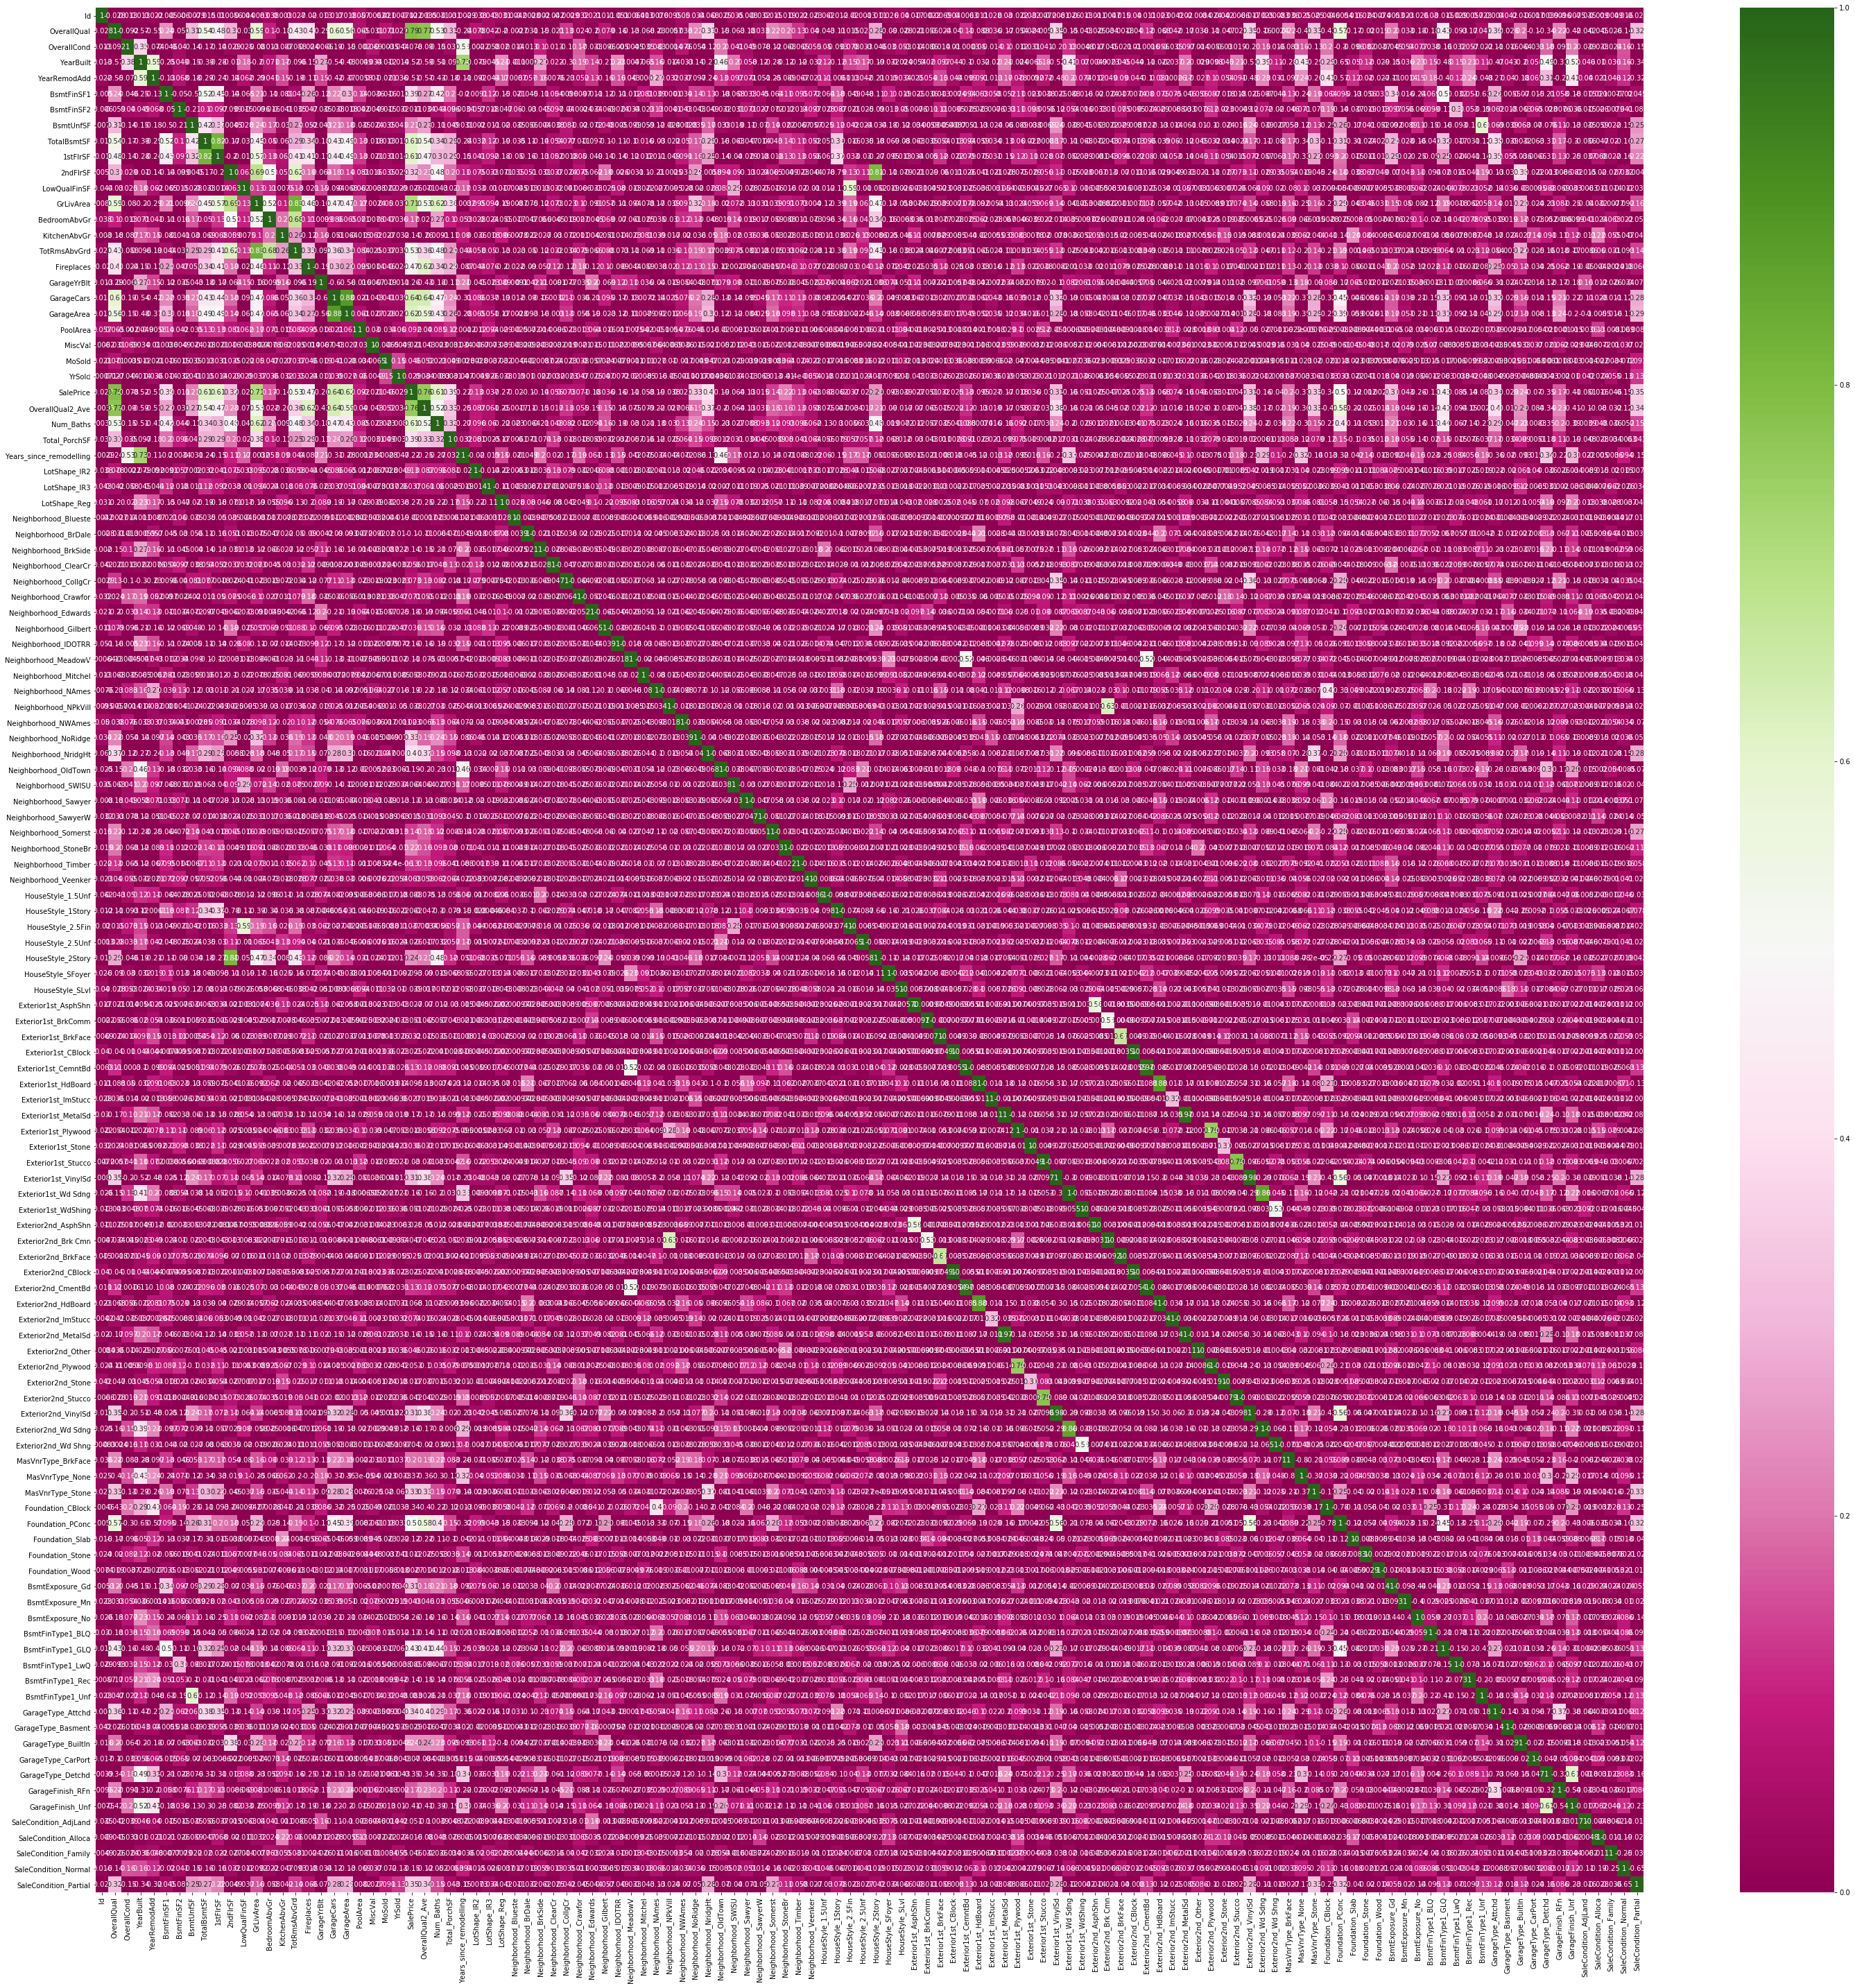

In [149]:
#Check Correlation (The green patches indicate high correlation areas)
plt.figure(figsize=(50,50))
sns.heatmap(df_dum.corr(),
            vmin=0,annot=True,
            cmap='PiYG')

## Model Building

### Let us first check the distribution of the predictor variable " SalePrice"

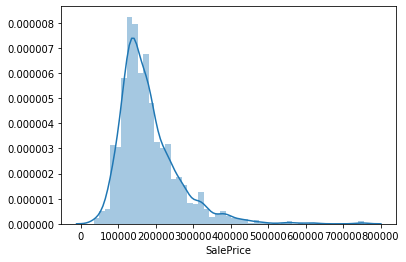

In [150]:
sns.distplot(df_dum["SalePrice"])

### Since the Sale price is really high and there is a lot of difference between the min and max saleprice, I will use log of the SalePrice to see how the distribution changes.

In [151]:
df_dum["SalePrice"] = np.log(df_dum['SalePrice'])
df_dum.head()

Id  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0   1            7            5         17            17         706   
1   2            6            8         44            44         978   
2   3            7            5         19            18         486   
3   4            7            5        105            50         216   
4   5            8            5         20            20         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       1710             3             1             8           0   
1       1262             3             1             6           1   
2       1786             3             1             6           1   
3       1717             3             1             7           1   
4       2198             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  PoolArea  MiscVal  MoSold  YrSold  \
0          7.0           2         548         0        0       2      12   
1         34.0           2         460         0        0       5      13   
2          9.0           2         608         0        0       9      12   
3         12.0           3         642         0        0       2      14   
4         10.0           3         836         0        0      12      12   

   SalePrice  OverallQual2_Ave  Num_Baths  Total_PorchSF  \
0  12.247694          3.333333          4             61   
1  12.109011          3.500000          3            298   
2  12.317167          3.833333          4             42   
3  11.849398          3.500000          2            307   
4  12.429216          3.833333          4            276   

   Years_since_remodelling  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0                        0             0             0             1   
1                        0             0             0             1   
2                        1             0             0             0   
3                       55             0             0             0   
4                        0             0             0             0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0           

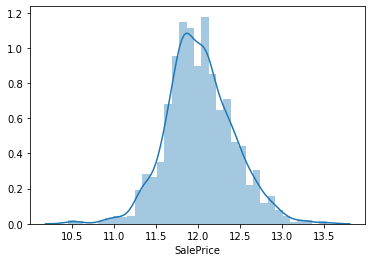

In [152]:
# this distribution gives a better picture of the center, spread and shape making it more interpretable
sns.distplot(df_dum["SalePrice"])


In [153]:
df_dum.drop(["Id"],axis=1,inplace=True)# dropping the Id 


In [154]:
df_dum.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=119)

# RFE
We will perform RFE to choose n_features to perform Ridge and Lasso on.I will pick n-fetures by using RFE_CF

In [155]:
# Import the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Splitting the data in to Train-Test

In [156]:
np.random.seed(0)
Dum_df_train, Dum_df_test = train_test_split(df_dum, train_size=0.7,test_size=0.3,random_state=100)
Dum_df_train.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=119)

In [157]:
Dum_df_train.head()

OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
210             5            6         95            70         468   
318             7            5         27            27         987   
239             6            4         75            70          94   
986             6            8        110            17           0   
1416            4            6        135            70           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
210            0        396          864       864         0             0   
318            0        360         1347      1372      1274             0   
239            0        641          735       798       689             0   
986            0        485          485      1001       634             0   
1416           0        777          777      1246      1044             0   

      GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
210         864             2             1             5           0   
318        2646             4             1             9           1   
239        1487             3             1             7           1   
986        1635             2             1             5           0   
1416       2290             4             2            11           0   

      GarageYrBlt  GarageCars  GarageArea  PoolArea  MiscVal  MoSold  YrSold  \
210        2003.0           0           0         0        0       4      12   
318          17.0           3         656         0        0       4      11   
239          61.0           1         220         0        0       4      10   
986          60.0           1         255         0        0       6      14   
1416         39.0           2         560         0        0       4      10   

      SalePrice  OverallQual2_Ave  Num_Baths  Total_PorchSF  \
210   11.492723          2.000000          2             96   
318   12.468437          3.833333          4            544   
239   11.635143          3.166667          2            140   
986   11.669929          2.666667          1            394   
1416  11.715866          2.666667          2            114   

      Years_since_remodelling  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
210                        25             0             0             1   
318                         0             0             0             1   
239                         5             0             0             1   
986                        93             0             0             1   
1416                       65             0             0             1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
210                      0                    0                     0   
318                      0                    0                     0   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
210                      0                     0                     0   
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                     0   
1416                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
210                      1                     0                    0   
318                      0                     0                    0   
239                      1                     0                    0   
986                      0                     0                    0   
1416                     0                     0                    0   

      Neighborhood_MeadowV  Neighborh

In [158]:
Scaler=MinMaxScaler()

In [159]:
Vars=['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Num_Baths',
       'Total_PorchSF', 'Years_since_remodelling', 'GarageYrBlt',
       'OverallQual2_Ave']

In [160]:
Dum_df_train[Vars]=Scaler.fit_transform(Dum_df_train[Vars])

In [161]:
Dum_df_train.describe()

OverallQual  OverallCond    YearBuilt  YearRemodAdd   BsmtFinSF1  \
count  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   
mean      0.565676     0.572723     0.280785      0.417695     0.079337   
std       0.155529     0.136506     0.219897      0.343843     0.082377   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.444444     0.500000     0.072464      0.100000     0.000000   
50%       0.555556     0.500000     0.268116      0.266667     0.069454   
75%       0.666667     0.625000     0.405797      0.716667     0.126152   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.033980     0.241388     0.173773     0.184341     0.165943   
std       0.115907     0.192066     0.075145     0.092132     0.210799   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.092466     0.129787     0.116435     0.000000   
50%       0.000000     0.197774     0.162357     0.165278     0.000000   
75%       0.000000     0.345034     0.215057     0.243056     0.352058   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LowQualFinSF    GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count   1021.000000  1021.000000   1021.000000   1021.000000   1021.000000   
mean       0.011649     0.207345      0.356881      0.026934      0.318315   
std        0.093608     0.102232      0.102552      0.115084      0.145956   
min        0.000000     0.000000      0.000000      0.000000      0.000000   
25%        0.000000     0.133743      0.250000      0.000000      0.181818   
50%        0.000000     0.197540      0.375000      0.000000      0.272727   
75%        0.000000     0.255573      0.375000      0.000000      0.363636   
max        1.000000     1.000000      1.000000      1.000000      1.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea     PoolArea  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.199151     0.071514     0.442458     0.332545     0.003318   
std       0.215306     0.228289     0.187036     0.150018     0.053278   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.004493     0.250000     0.231312     0.000000   
50%       0.333333     0.015976     0.500000     0.338505     0.000000   
75%       0.333333     0.025961     0.500000     0.406206     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           MiscVal       MoSold       YrSold    SalePrice  OverallQual2_Ave  \
count  1021.000000  1021.000000  1021.000000  1021.000000       1021.000000   
mean      0.003143     0.480634     0.545054     0.508077          0.597142   
std       0.037314     0.249954     0.334756     0.129030          0.177082   
min       0.000000     0.000000     0.000000     0.000000          0.000000   
25%       0.000000     0.272727     0.250000     0.426511          0.454545   
50%       0.000000     0.454545     0.500000     0.495307          0.590909   
75%       0.000000     0.636364     0.750000     0.589900          0.727273   
max       1.000000     1.000000     1.000000     1.000000          1.000000   

         Num_Baths  Total_PorchSF  Years_since_remodelling  LotShape_IR2  \
count  1021.000000    1021.000000              1021.000000   1021.000000   
mean      0.288345       0.194506                 0.111273      0.030362   
std       0.183835       0.166785                 0.199793      0.171666   
min       0.000000       0.000000                 0.000000      0.000000   
25%       0.200000       0.045210                 0.000000      0.000000   
50%       0.200000       0.176534                 0.000000      0.000000   
75%       0.400000       0.287406                 

In [162]:
Dum_df_train.shape

(1021, 119)

In [163]:
y_train = Dum_df_train.pop('SalePrice')
X_train = Dum_df_train

### Performing RFE_CV to get n_features

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
ref_lr = LinearRegression()
rfe_cv = RFECV(estimator=ref_lr, step=1,cv=5, scoring="neg_mean_absolute_error")
rfe_cv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_absolute_error',
      step=1, verbose=0)

In [165]:
rfe_cv.n_features_

30

### Buliding a model with 30 features

In [166]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 30)  
rfe = rfe.fit(X_train, y_train)

In [167]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 8),
 ('BsmtUnfSF', False, 9),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 84),
 ('GarageYrBlt', False, 33),
 ('GarageCars', True, 1),
 ('GarageArea', False, 32),
 ('PoolArea', True, 1),
 ('MiscVal', False, 60),
 ('MoSold', False, 83),
 ('YrSold', False, 57),
 ('OverallQual2_Ave', True, 1),
 ('Num_Baths', True, 1),
 ('Total_PorchSF', True, 1),
 ('Years_since_remodelling', True, 1),
 ('LotShape_IR2', False, 52),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 88),
 ('Neighborhood_Blueste', False, 25),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', False, 23),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_CollgCr', False, 

In [168]:
col= X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'PoolArea',
       'OverallQual2_Ave', 'Num_Baths', 'Total_PorchSF',
       'Years_since_remodelling', 'LotShape_IR3', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Foundation_Stone'],
      dtype='object')

In [169]:
#Create a dataframe
X_train_rfe = X_train[col]

In [170]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [171]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [172]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        17:36:37   Log-Likelihood:                 1738.5
No. Observations:                1021   AIC:                            -3417.
Df Residuals:                     991   BIC:                            -3269.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
18  Years_since_remodelling     inf
3                 YearBuilt     inf
4              YearRemodAdd     inf
9                 GrLivArea  136.63
0                     const  103.08
8                  2ndFlrSF   92.10
7                  1stFlrSF   78.59
12             TotRmsAbvGrd    5.18
6               TotalBsmtSF    4.18
15         OverallQual2_Ave    4.05
1               OverallQual    3.54
16                Num_Baths    2.89
10             BedroomAbvGr    2.44
13               GarageCars    2.01
5                BsmtFinSF1    1.97
2               OverallCond    1.55
11             KitchenAbvGr    1.54
17            Total_PorchSF    1.34
26     Neighborhood_NridgHt    1.34
25     Neighborhood_NoRidge    1.25
14                 PoolArea    1.19
22     Neighborhood_Crawfor    1.12
23      Neighborhood_IDOTRR    1.12
29      Exterior1st_BrkFace    1.10
27     Neighborhood_StoneBr    1.09
20      Neighborhood_BrDale    1.08
19             LotShape_IR3    1.07
24     Neighborhood_MeadowV    1.05
21     Neighborhood_ClearCr    1.05
30         Foundation_Stone    1.05
28      Exterior1st_BrkComm    1.04

### YearRemodAdd, Years_since_remodeling,Yearbuilt have VIF= inf which means the variance of this variable is being explained by other variables, so these variables can be dropped.

In [174]:
#X_train_rfe.columns

In [175]:
X_train_new=X_train_rfe.drop(['Years_since_remodelling','YearBuilt','YearRemodAdd'],axis=1)


In [176]:
X_train_new.columns

Index(['const', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'PoolArea', 'OverallQual2_Ave',
       'Num_Baths', 'Total_PorchSF', 'LotShape_IR3', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Foundation_Stone'],
      dtype='object')

In [177]:
df_dum.shape

(1460, 119)

In [178]:
df_dum=Dum_df_train.filter(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'PoolArea', 'OverallQual2_Ave',
       'Num_Baths', 'Total_PorchSF', 'LotShape_IR3', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Foundation_Stone'])

In [179]:
df_dum.head()

OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210      0.444444        0.625    0.082920     0.141408  0.113889  0.000000   
318      0.666667        0.500    0.174876     0.220458  0.231481  0.616949   
239      0.555556        0.375    0.016655     0.120295  0.098611  0.333656   
986      0.555556        0.875    0.000000     0.079378  0.145602  0.307022   
1416     0.333333        0.625    0.000000     0.127169  0.202315  0.505569   

      GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
210    0.081860         0.250           0.0      0.181818        0.00   
318    0.424289         0.500           0.0      0.545455        0.75   
239    0.201576         0.375           0.0      0.363636        0.25   
986    0.230015         0.250           0.0      0.181818        0.25   
1416   0.355880         0.500           0.5      0.727273        0.50   

      PoolArea  OverallQual2_Ave  Num_Baths  Total_PorchSF  LotShape_IR3  \
210        0.0          0.272727        0.2       0.103337             0   
318        0.0          0.772727        0.6       0.585576             0   
239        0.0          0.590909        0.2       0.150700             0   
986        0.0          0.454545        0.0       0.424112             0   
1416       0.0          0.454545        0.2       0.122713             0   

      Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_Crawfor  \
210                     0                     0                     0   
318                     0                     0                     0   
239                     0                     0                     0   
986                     0                     0                     0   
1416                    0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_NoRidge  \
210                     0                     0                     0   
318                     0                     0                     1   
239                     0                     0                     0   
986                     0                     0                     0   
1416                    0                     0                     0   

      Neighborhood_NridgHt  Neighborhood_StoneBr  Exterior1st_BrkComm  \
210                      0                     0                    0   
318                      0                     0                    0   
239                      0                     0                    0   
986                      0                     0                    0   
1416                     0                     0                    0   

      Exterior1st_BrkFace  Foundation_Stone  
210                     0                 0  
318                     0                 0  
239                     0                 0  
986                     0                 0  
1416                    0                 0

In [180]:
df_dum.shape

(1021, 27)

In [181]:
df_dum["SalePrice"] = np.log(df['SalePrice'])

In [182]:
df_dum.shape

(1021, 28)

In [183]:
df_dum.head()

OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210      0.444444        0.625    0.082920     0.141408  0.113889  0.000000   
318      0.666667        0.500    0.174876     0.220458  0.231481  0.616949   
239      0.555556        0.375    0.016655     0.120295  0.098611  0.333656   
986      0.555556        0.875    0.000000     0.079378  0.145602  0.307022   
1416     0.333333        0.625    0.000000     0.127169  0.202315  0.505569   

      GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
210    0.081860         0.250           0.0      0.181818        0.00   
318    0.424289         0.500           0.0      0.545455        0.75   
239    0.201576         0.375           0.0      0.363636        0.25   
986    0.230015         0.250           0.0      0.181818        0.25   
1416   0.355880         0.500           0.5      0.727273        0.50   

      PoolArea  OverallQual2_Ave  Num_Baths  Total_PorchSF  LotShape_IR3  \
210        0.0          0.272727        0.2       0.103337             0   
318        0.0          0.772727        0.6       0.585576             0   
239        0.0          0.590909        0.2       0.150700             0   
986        0.0          0.454545        0.0       0.424112             0   
1416       0.0          0.454545        0.2       0.122713             0   

      Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_Crawfor  \
210                     0                     0                     0   
318                     0                     0                     0   
239                     0                     0                     0   
986                     0                     0                     0   
1416                    0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_NoRidge  \
210                     0                     0                     0   
318                     0                     0                     1   
239                     0                     0                     0   
986                     0                     0                     0   
1416                    0                     0                     0   

      Neighborhood_NridgHt  Neighborhood_StoneBr  Exterior1st_BrkComm  \
210                      0                     0                    0   
318                      0                     0                    0   
239                      0                     0                    0   
986                      0                     0                    0   
1416                     0                     0                    0   

      Exterior1st_BrkFace  Foundation_Stone  SalePrice  
210                     0                 0  11.492723  
318                     0                 0  12.468437  
239                     0                 0  11.635143  
986                     0                 0  11.669929  
1416                    0                 0  11.715866

In [184]:
np.random.seed(0)
Dum_df_train, Dum_df_test = train_test_split(df_dum, train_size=0.7,test_size=0.3,random_state=100)
Dum_df_train.columns

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageCars', 'PoolArea', 'OverallQual2_Ave', 'Num_Baths',
       'Total_PorchSF', 'LotShape_IR3', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Foundation_Stone', 'SalePrice'],
      dtype='object')

In [185]:
y_train = Dum_df_train.pop('SalePrice')
X_train = Dum_df_train

In [186]:
X_test=Dum_df_test
y_test=Dum_df_test.pop('SalePrice')

## Ridge regression on the 30 features from RFE

In [187]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [188]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os

In [675]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [676]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002289      0.000424         0.000967        0.000148      0.0001   
1       0.001763      0.000058         0.000815        0.000084       0.001   
2       0.001851      0.000105         0.000828        0.000067        0.01   
3       0.001897      0.000182         0.000829        0.000068        0.05   
4       0.001702      0.000227         0.000866        0.000109         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.747927           0.908228           0.864648   
1   {'alpha': 0.001}           0.747964           0.908218           0.864714   
2    {'alpha': 0.01}           0.748322           0.908127           0.865084   
3    {'alpha': 0.05}           0.749997           0.907860           0.865382   
4     {'alpha': 0.1}           0.752104           0.907593           0.865359   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.856707           0.895683         0.854639        0.056654   
1           0.856704           0.895841         0.854688        0.056663   
2           0.856692           0.896866         0.855018        0.056675   
3           0.856811           0.898036         0.855617        0.056180   
4           0.857028           0.898223         0.856061        0.055367   

   rank_test_score  split0_train_score  split1_train_score  \
0               17            0.904756            0.874405   
1               16            0.904755            0.874405   
2               15            0.904734            0.874396   
3               13            0.904638            0.874343   
4               12            0.904544            0.874279   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.882709            0.886681            0.878907   
1            0.882709            0.886681            0.878906   
2            0.882703            0.886670            0.878830   
3            0.882679            0.886610            0.878513   
4            0.882655            0.886545            0.878325   

   mean_train_score  std_train_score  
0          0.885492         0.010455  
1          0.885491         0.010455  
2          0.885467         0.010459  
3          0.885357         0.010475  
4          0.885270         0.010478

In [677]:
model_cv.best_score_

0.8591646693890513

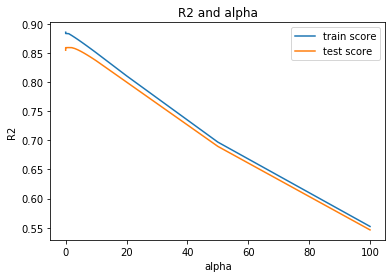

In [679]:
#plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [696]:
ridge=Ridge(alpha=3)
ridge_model=ridge.fit(X_train,y_train)


In [697]:
y_pred_ridge_1=ridge_model.predict(X_train)

In [698]:
r2_score(y_true=y_train,y_pred=y_pred_ridge_1)

0.8770358624303328

In [670]:
y_pred_ridge=ridge_model.predict(X_test)

In [245]:
r2_score(y_true=y_test,y_pred=y_pred_ridge)

0.8146616282254093

In [688]:
alpha = 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
np.sort(ridge.coef_)

array([-0.21153038, -0.14742026, -0.13547261, -0.13471388, -0.13262223,
        0.01747557,  0.01833822,  0.01867794,  0.03819334,  0.05447859,
        0.0664333 ,  0.07184137,  0.07210061,  0.09117661,  0.10947253,
        0.11125116,  0.12646899,  0.17593622,  0.18670434,  0.20688012,
        0.28769905,  0.29480086,  0.31204534,  0.35108786,  0.36831315,
        0.4647786 ,  0.57911905])

In [691]:
Final_Features_Ridge=list(zip(X_train.columns,ridge.coef_))

In [692]:
Final_Features_Ridge

[('OverallQual', 0.579119053769914),
 ('OverallCond', 0.17593621876058915),
 ('BsmtFinSF1', 0.206880121811043),
 ('TotalBsmtSF', 0.31204534114085297),
 ('1stFlrSF', 0.3510878575613702),
 ('2ndFlrSF', 0.017475573303391553),
 ('GrLivArea', 0.28769905357496817),
 ('BedroomAbvGr', 0.03819334402857236),
 ('KitchenAbvGr', -0.21153037733865002),
 ('TotRmsAbvGrd', 0.18670433782664686),
 ('GarageCars', 0.2948008561393471),
 ('PoolArea', 0.06643329569259333),
 ('OverallQual2_Ave', 0.4647785988529168),
 ('Num_Baths', 0.3683131499989043),
 ('Total_PorchSF', 0.07184137341032451),
 ('LotShape_IR3', 0.01867793889248817),
 ('Neighborhood_BrDale', -0.13547261230508023),
 ('Neighborhood_ClearCr', 0.12646898911482723),
 ('Neighborhood_Crawfor', 0.09117660647977072),
 ('Neighborhood_IDOTRR', -0.13262223481542754),
 ('Neighborhood_MeadowV', -0.13471387886182998),
 ('Neighborhood_NoRidge', 0.1112511551519836),
 ('Neighborhood_NridgHt', 0.10947252774968318),
 ('Neighborhood_StoneBr', 0.054478588542734296),
 

## Lasso

In [201]:
from sklearn.linear_model import Lasso
lasso1 = Lasso()
lasso1.fit(X_train, y_train)
print("Number of non-zero coff.: {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
from sklearn.metrics import mean_squared_error,r2_score
print("R2 score train: {}".format(r2_score(y_train,y_pred_train)))

Number of non-zero coff.: 0
R2 score train: 0.0


In [202]:
y_pred_test = lasso1.predict(X_test)

print("R2 score test: {}".format(r2_score(y_test,y_pred_test)))

R2 score test: -0.013946741833992915


In [203]:
lasso1.coef_

array([ 0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0.])

In [708]:
# hyper parameter tuining 
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,1]}

lasso2 = Lasso()

folds = 5

from sklearn.model_selection import GridSearchCV

model_cv= GridSearchCV(estimator=lasso2,param_grid=params, scoring='r2', cv=folds)

model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [709]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004082      0.001043         0.000985        0.000105      0.0001   
1       0.002380      0.000179         0.000927        0.000029       0.001   
2       0.001876      0.000029         0.000790        0.000037        0.01   
3       0.001832      0.000095         0.000772        0.000006        0.05   
4       0.001831      0.000036         0.000815        0.000035         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.750875           0.907474           0.864977   
1   {'alpha': 0.001}           0.765063           0.895452           0.859775   
2    {'alpha': 0.01}           0.758698           0.772770           0.741491   
3    {'alpha': 0.05}           0.180532           0.099745           0.080462   
4     {'alpha': 0.1}          -0.001882          -0.002828          -0.004614   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.858560           0.898319         0.856041        0.055819   
1           0.854700           0.891441         0.853286        0.047035   
2           0.780882           0.773503         0.765469        0.013973   
3           0.178611           0.129304         0.133731        0.040538   
4          -0.025394          -0.001176        -0.007179        0.009180   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5

In [205]:
Lasso_model_cv.best_score_

0.8560410833142168

In [700]:
Lasso_model_cv.best_params_

{'alpha': 0.0001}

In [711]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

KeyError: 'mean_train_score'

In [699]:
lasso1 = Lasso(alpha=0.002)

lasso1.fit(X_train, y_train)
print("Number of non-zero coff.: {}".format(np.sum(lasso1.coef_!=0)))

y_pred_train = lasso1.predict(X_train)

print("R2 score train: {}".format(r2_score(y_train,y_pred_train)))

y_pred_test = lasso1.predict(X_test)

print("R2 score test: {}".format(r2_score(y_test,y_pred_test)))




Number of non-zero coff.: 17
R2 score train: 0.8597703385854811
R2 score test: 0.8208428382924848


In [260]:
np.sort(lasso1.coef_,asc)

array([-0.07205999, -0.06292574,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.00175586,  0.02371417,  0.03569307,
        0.03754659,  0.04946359,  0.06960996,  0.07704353,  0.07911489,
        0.11913814,  0.24920025,  0.26472691,  0.42202155,  0.5774317 ,
        0.57907313,  0.68468966])

In [685]:
Final_Features_Lasso=list(zip(X_train.columns,lasso1.coef_))


In [686]:
Final_Features_Lasso


[('OverallQual', -0.07205999456897336),
 ('OverallCond', -0.06292574257352197),
 ('BsmtFinSF1', 0.0),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('GarageCars', 0.0),
 ('PoolArea', 0.0),
 ('OverallQual2_Ave', 0.001755858448129846),
 ('Num_Baths', 0.023714171057753107),
 ('Total_PorchSF', 0.035693071062089764),
 ('LotShape_IR3', 0.037546594928953445),
 ('Neighborhood_BrDale', 0.04946358887020404),
 ('Neighborhood_ClearCr', 0.06960995582705161),
 ('Neighborhood_Crawfor', 0.07704353011708417),
 ('Neighborhood_IDOTRR', 0.07911488970845675),
 ('Neighborhood_MeadowV', 0.11913814190275557),
 ('Neighborhood_NoRidge', 0.2492002485065404),
 ('Neighborhood_NridgHt', 0.26472691186190855),
 ('Neighborhood_StoneBr', 0.4220215473411123),
 ('Exterior1st_BrkComm', 0.5774316985213025),
 ('Exterior1st_BrkFace', 0.5790731326395017),
 ('Foundation_Stone', 0.6846896554527375)]

In [211]:
#RFCCV
# stratified sampling : that all the subsets that are created are representative of the actual data Pattern preservation
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
ref_lr = LinearRegression()
rfe_cv = RFECV(estimator=ref_lr, step=1,cv=5, scoring="neg_mean_absolute_error")
rfe_cv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_absolute_error',
      step=1, verbose=0)

In [212]:
rfe_cv.n_features_

22

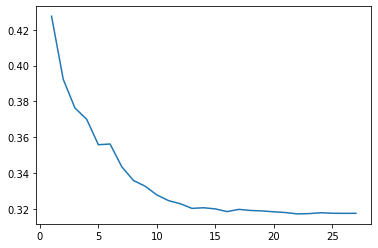

In [213]:
plt.plot(range(1,len(rfe_cv.grid_scores_)+1), np.sqrt(-rfe_cv.grid_scores_))